# Laboratorio: Uso de filtros espaciales y morfológicos

## Integrantes

*   Abril Lancheros, Hector Enrique
*   Clavijo Sánchez, Cesar Humberto
*   Hernández Martínez, Ricardo
*   Pimentel Díaz, Carlos Daniel
*   Sánchez Sánchez, Julio Moisés

### Funciones utilizadas

In [6]:
#Realizar operaciones sobre matrices
import numpy as np
import skimage
from skimage import io
from skimage.color import rgb2gray
from matplotlib import pyplot as plt
from skimage.morphology import disk
from skimage.morphology import closing
from skimage.morphology import opening
from skimage.morphology import dilation
from skimage.morphology import erosion, square
from skimage.morphology import diamond, ball, rectangle
from skimage import img_as_uint
from skimage.filters import sobel
#visualizar imagenes
%pylab inline
import matplotlib.image as mpimg
import pandas as pd
import cv2

def plot_comparasion(original, filtered, original_name, filter_name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,10), sharex=True, sharey=True)
    ax1.imshow(original,cmap=plt.cm.gray)
    ax1.set_title(original_name)
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')
    plt.show() 

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\envs\A\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['square']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [1]:
def plot_comparasionIv(original, filtered, filter_name, filteredII, filter_nameII, filteredIII, filter_nameIII, filteredIv, filter_nameIv):
    fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(ncols=5, figsize=(20,10), sharex=True, sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('Imagen Original')
    ax1.axis('off')
    #ax1.set_adjustable('box-forced')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')
    #ax2.set_adjustable('box-forced')
    ax3.imshow(filteredII, cmap=plt.cm.gray)
    ax3.set_title(filter_nameII)
    ax3.axis('off')
    ax4.imshow(filteredIII, cmap=plt.cm.gray)
    ax4.set_title(filter_nameIII)
    ax4.axis('off')
    ax5.imshow(filteredIv, cmap=plt.cm.gray)
    ax5.set_title(filter_nameIv)
    ax5.axis('off')
    plt.show()

In [17]:
def plot_comparasionIII(filtered, filter_name, filteredII, filter_nameII, filteredIII, filter_nameIII, filteredIv, filter_nameIv):
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20,10), sharex=True, sharey=True)
    ax1.imshow(filtered, cmap=plt.cm.gray)
    ax1.set_title(filter_name)
    ax1.axis('off')
    ax2.imshow(filteredII, cmap=plt.cm.gray)
    ax2.set_title(filter_nameII)
    ax2.axis('off')
    ax3.imshow(filteredIII, cmap=plt.cm.gray)
    ax3.set_title(filter_nameIII)
    ax3.axis('off')
    ax4.imshow(filteredIv, cmap=plt.cm.gray)
    ax4.set_title(filter_nameIv)
    ax4.axis('off')
    plt.show() 

## LIEAG

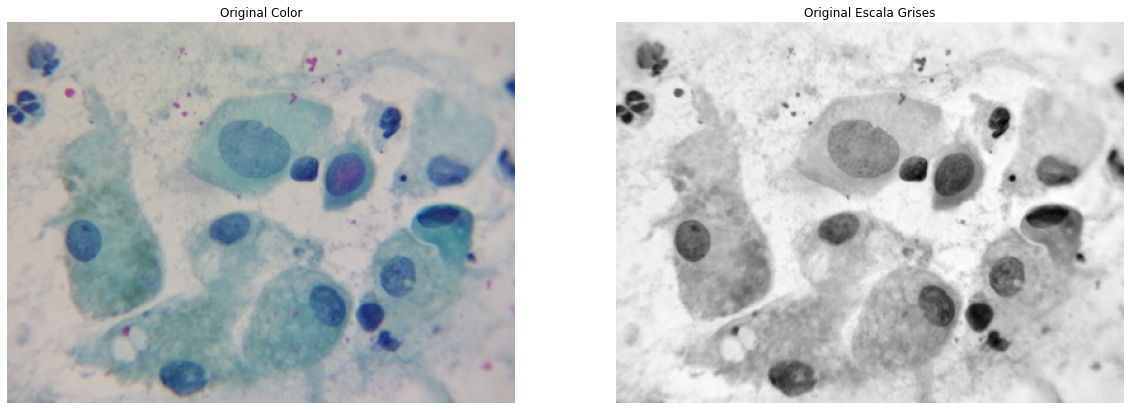

In [2]:
# Convertimos imagen original a escala de grises.
lieag1 = io.imread('LIEAG1.jpg')
gray_lieag1 = rgb2gray(lieag1)
plot_comparasion(lieag1,gray_lieag1,'Original Color','Original Escala Grises')

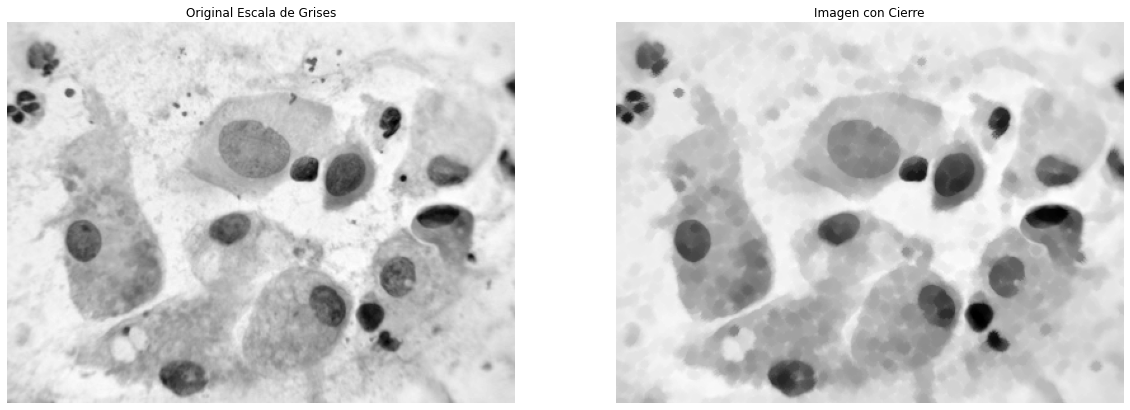

In [3]:
# Aplicamos la operación de cierre para intentar eliminar las partículas indeseadas.
cierre_lieag1 = closing(gray_lieag1, disk(3)) # Dilatación + erosión
plot_comparasion(gray_lieag1,cierre_lieag1,'Original Escala de Grises','Imagen con Cierre')

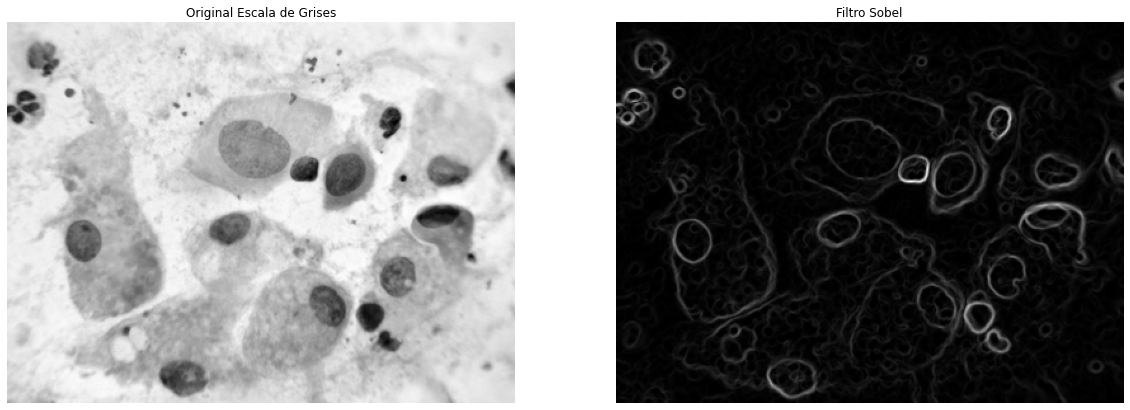

In [4]:
# Aplicamos el filtro sobel para detectar los contornos de las células y sus núcleos.
sobel_lieag1 = sobel(cierre_lieag1)
plot_comparasion(gray_lieag1,sobel_lieag1,'Original Escala de Grises','Filtro Sobel')

## LIEBG

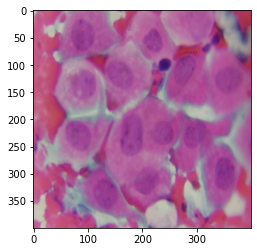

In [10]:
#Lectura de la imagen y disminuir el tamaño
size = 400
img = skimage.io.imread('LIEBG1.jpg')
img = skimage.transform.resize(img, (size, size))
imshow(img)

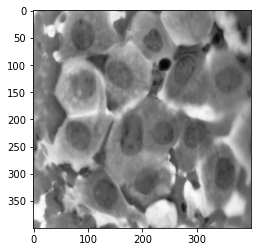

In [11]:
#Pasar a Escala de grises
img_gray = rgb2gray(img)
imshow(img_gray, cmap=plt.cm.gray)

Dilatación


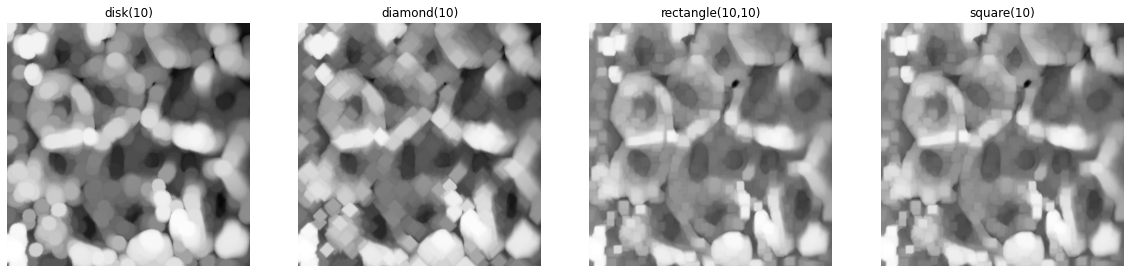

In [18]:
#Aplicar Filtro Dilatación con elementos estructurales (disk,diamond,rectangle,square)
#Dilatación. elemento disk(10)
img_dilatacion = dilation(img_gray,selem=disk(10))
#Dilatación. elemento diamond
img_dilataciondiam = dilation(img_gray,diamond(10))
#Dilatación. elemento rectangle
img_dilatacionrec = dilation(img_gray,rectangle(10,10))
#Dilatación. elemento square
img_dilatacionsquare = dilation(img_gray,square(10))
print('Dilatación')
plot_comparasionIII(img_dilatacion,'disk(10)',img_dilataciondiam,'diamond(10)',img_dilatacionrec,'rectangle(10,10)',img_dilatacionsquare,'square(10)')

Erosion


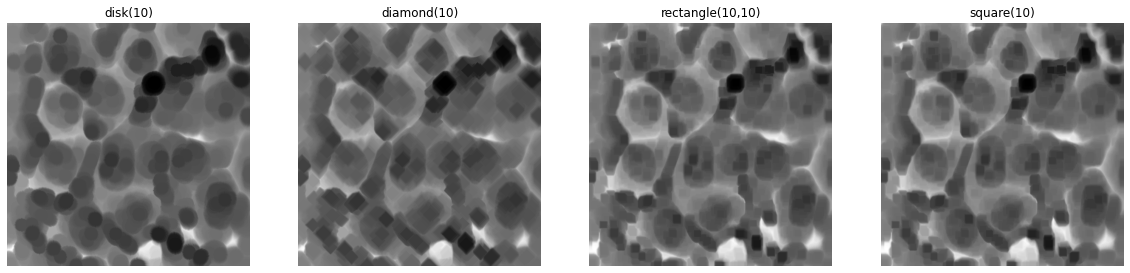

In [19]:
#Aplicar Filtro Erosion con elementos estructurales (disk,diamond,rectangle,square)
#Erosion. elemento disk(10)
img_erosion = erosion(img_gray,selem=disk(10))
#erosion. elemento diamond
img_erosiondiam = erosion(img_gray,diamond(10))
#erosion. elemento rectangle
img_erosionrec = erosion(img_gray,rectangle(10,10))
#erosion. elemento square
img_erosionsquare = erosion(img_gray,square(10))
print('Erosion')
plot_comparasionIII(img_erosion,'disk(10)',img_erosiondiam,'diamond(10)',img_erosionrec,'rectangle(10,10)',img_erosionsquare,'square(10)')

Clausura=Erosión - Dilatación


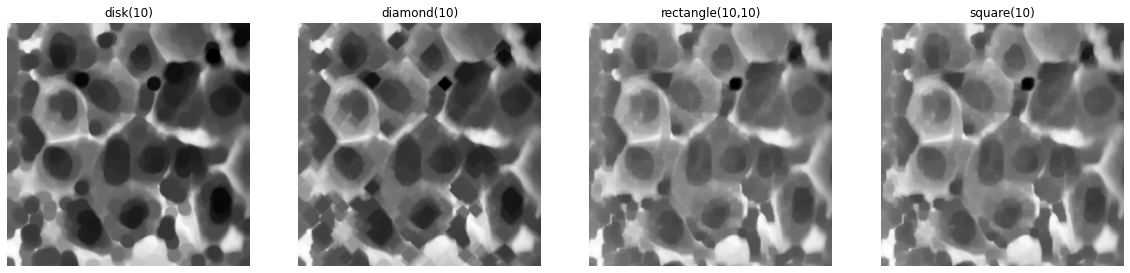

In [20]:
#Aplicar filtro Clausuario. con elementos estructurales (disk,diamond,rectangle,square)
#Clausura closing = Erosión - Dilatación. elemento disk(10)
img_closing = closing(img_gray,selem=disk(10))
#Clausura. elemento diamond
img_closingdiam = closing(img_gray,diamond(10))
#Clausura. elemento rectangle
img_closingrec = closing(img_gray,rectangle(10,10))
#Clausura. elemento square
img_closingsquare = closing(img_gray,square(10))
print('Clausura=Erosión - Dilatación')
plot_comparasionIII(img_closing,'disk(10)',img_closingdiam,'diamond(10)',img_closingrec,'rectangle(10,10)',img_closingsquare,'square(10)')

Apertura=Dilatación - Erosión


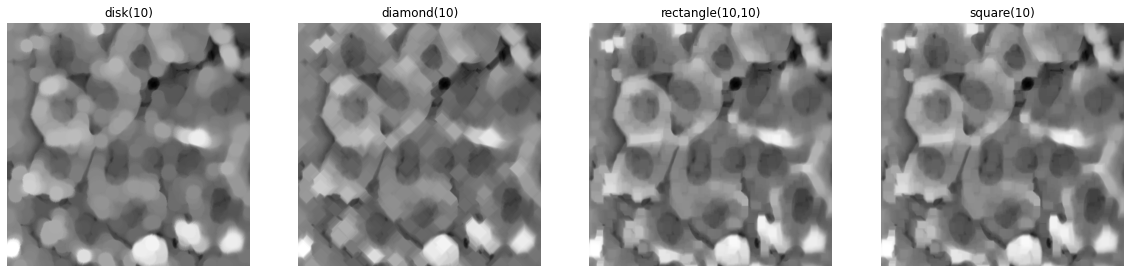

In [21]:
#Aplicar filtro Apertura. con elementos estructurales (disk,diamond,rectangle,square)
#Apertura opening = Dilatación - Erosión. elemento disk(10)
img_opening = opening(img_gray,selem=disk(10))
#Clausura. elemento diamond
img_openingdiam = opening(img_gray,diamond(10))
#Clausura. elemento rectangle
img_openingrec = opening(img_gray,rectangle(10,10))
#Clausura. elemento square
img_openingsquare = opening(img_gray,square(10))
print('Apertura=Dilatación - Erosión')
plot_comparasionIII(img_opening,'disk(10)',img_openingdiam,'diamond(10)',img_openingrec,'rectangle(10,10)',img_openingsquare,'square(10)')

## Vaginosis

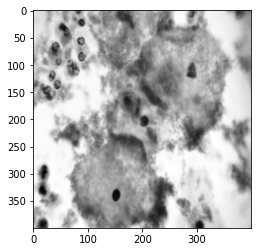

In [7]:
# Se carga la imagen y se reduce el tamaño a una escala 400x400
size = 400
img = skimage.io.imread('vaginosis1.jpg')/255.0
img = skimage.transform.resize(img, (size, size))
img_gray = rgb2gray(img)
imshow(img_gray, cmap="gray")

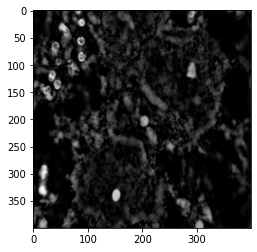

In [8]:
# Se aplica el filtro black hat (close - imagen)
img_closing = closing(img_gray,selem=disk(10))
black_hat=img_closing-img_gray
imshow(black_hat,cmap="gray")

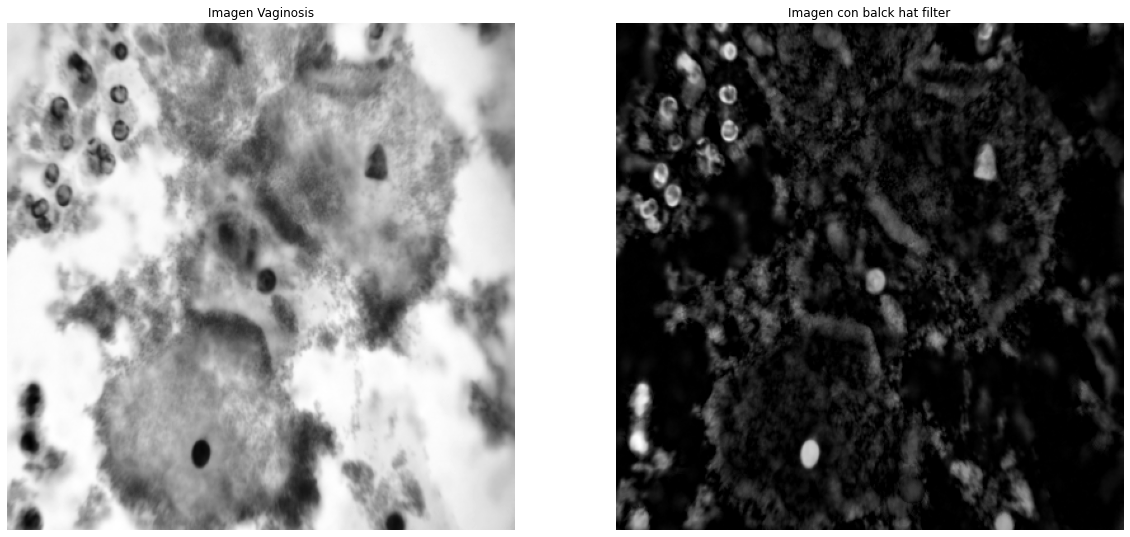

In [65]:
plot_comparasion(img_gray, black_hat, "Imagen Vaginosis", "Imagen con balck hat filter")

### Usando el black hat el cual consiste en la la resta de : Imagen con filtro de clausura - la imagen original.con estos las celulas de interes se resaltan en blanco sobre un fondo oscuro permitiendo resaltar en la imagen de vaginosis las celulas en la imagen.

## Cándida

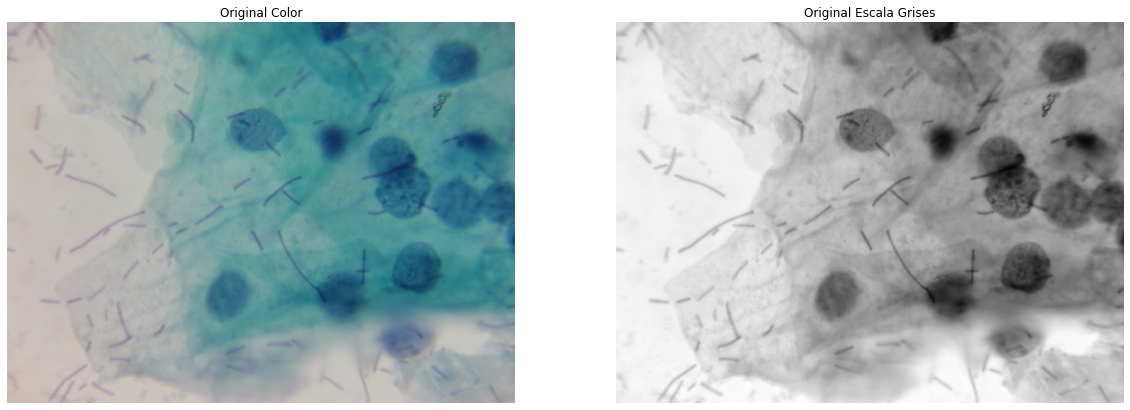

In [5]:
# Se convierte la imagen original a escala de grises.
candida = io.imread('candida2.jpg')
gray_candida = rgb2gray(candida)
plot_comparasion(candida, gray_candida,'Original Color','Original Escala Grises')

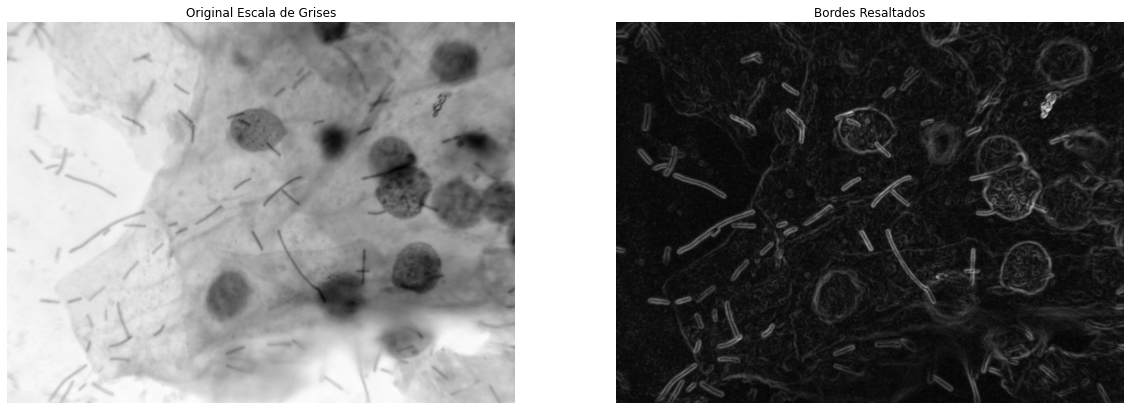

In [6]:
# Se resaltan los bordes (Dilatación - Erosión)
gc_Dila = dilation(gray_candida, disk(9)) 
gc_Ero = erosion(gray_candida, disk(9))
border_candida = gc_Dila - gc_Ero
plot_comparasion(gray_candida, border_candida, 'Original Escala de Grises','Bordes Resaltados')

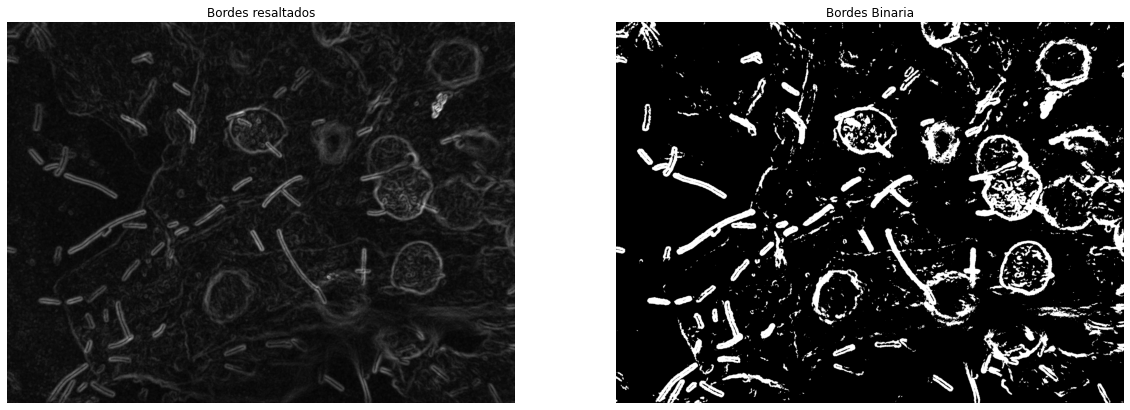

In [7]:
# Se pasa la imagen a binaria para poder quitar la mayor parte del ruido de fondo, correspondiente al citoplasma de las células
from skimage.filters import threshold_otsu

# Valor de umbral a partir del cual se toma como 0 - 1
thresh_candida = threshold_otsu(border_candida)
# Generación de matriz binaria
binary_candida = border_candida > thresh_candida
plot_comparasion(border_candida, binary_candida, 'Bordes resaltados','Bordes Binaria')

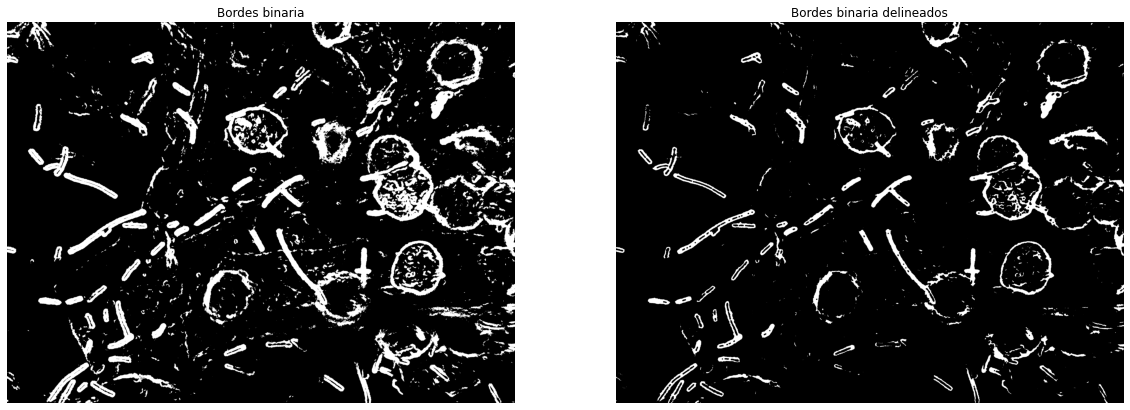

In [8]:
# Se intentan delinear los bordes de manera más fina
# Mayor tamaño de disco -> desaparecen bordes
# Dilatación crea un borde grande pero erosión dejaría una línea pequeña. Al hacer 'and' se pierde
binDila = dilation(binary_candida, disk(5)) 
binEro = erosion(binary_candida, disk(5))
# Se hace un and - el borde queda más delgado pues será verdadero sólo donde coincide la dilatación y la erosión como true
# Se elimina de igual manera ruido de fondo
border_binary_candida = binDila & binEro

plot_comparasion(binary_candida, border_binary_candida, 'Bordes binaria','Bordes binaria delineados')

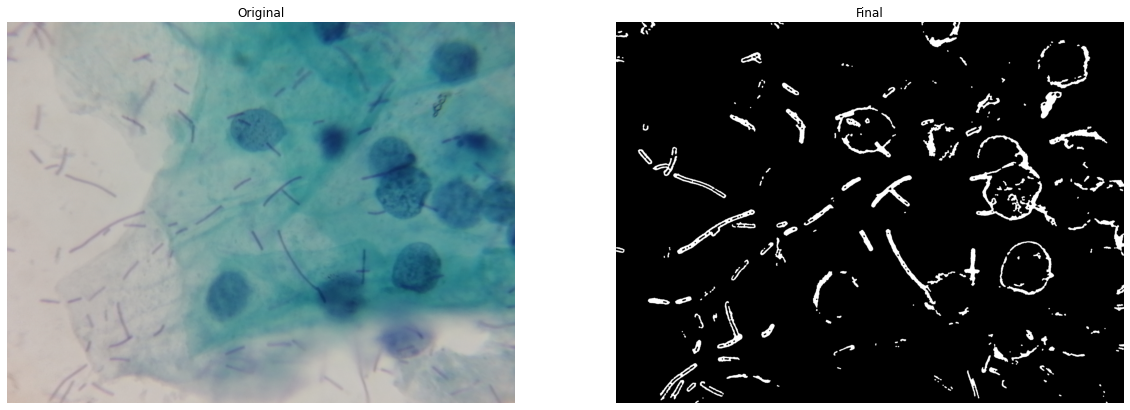

In [9]:
# Para borrar algo más de ruido
binary_erosion_candida = closing(opening(border_binary_candida, disk(5)), disk(5))
# Buena detección en la zona de la imagen donde no se encuentran los núcleos de las celulas
plot_comparasion(candida, binary_erosion_candida, 'Original','Final')